Vizualizing Data

In [4]:
#import libraries needed
import numpy as np #handles arrays
import matplotlib.pyplot as plt #plots things
plt.rcParams.update({'font.size': 22})
import matplotlib.dates as dates #this is so plotting library can read datetimes
from datetime import datetime #so we can make datetimeobjects
import dateutil

In [5]:
#take the data
data=np.genfromtxt('C:/Users/oalamin/OneDrive - NASA/Documents/Aaron_project/FU4_hires_data.txt',comments='#',dtype=datetime) #get data from txt file as datetime
datafloats=np.genfromtxt('C:/Users/oalamin/OneDrive - NASA/Documents/Aaron_project/FU4_hires_data.txt',comments='#',dtype=float) #get data as float

In [6]:
#gather the arrays of times and burst values
t_values = np.empty(52920,dtype=object) #makes empty array
for i in range(0,len(t_values),1):
    t_values[i]= dateutil.parser.parse(data[i,0]) #fills up array with 0th column of data

bursts = np.ones(52920)
for i in range(0,52920,1):
    bursts[i]=datafloats[i,13] #fills up y-axis array with data, first columnated detection 219.7 - 283.4 keV

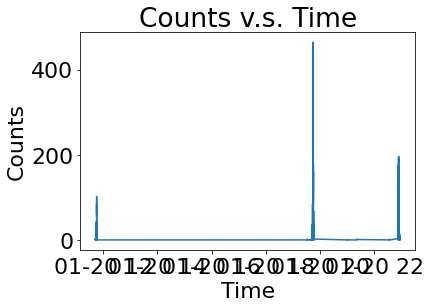

In [7]:
#plot the arrays, unedited bursts
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}


plt.plot(t_values, bursts) #plots data
plt.title('Counts v.s. Time')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.savefig('image_1.png')
plt.show()


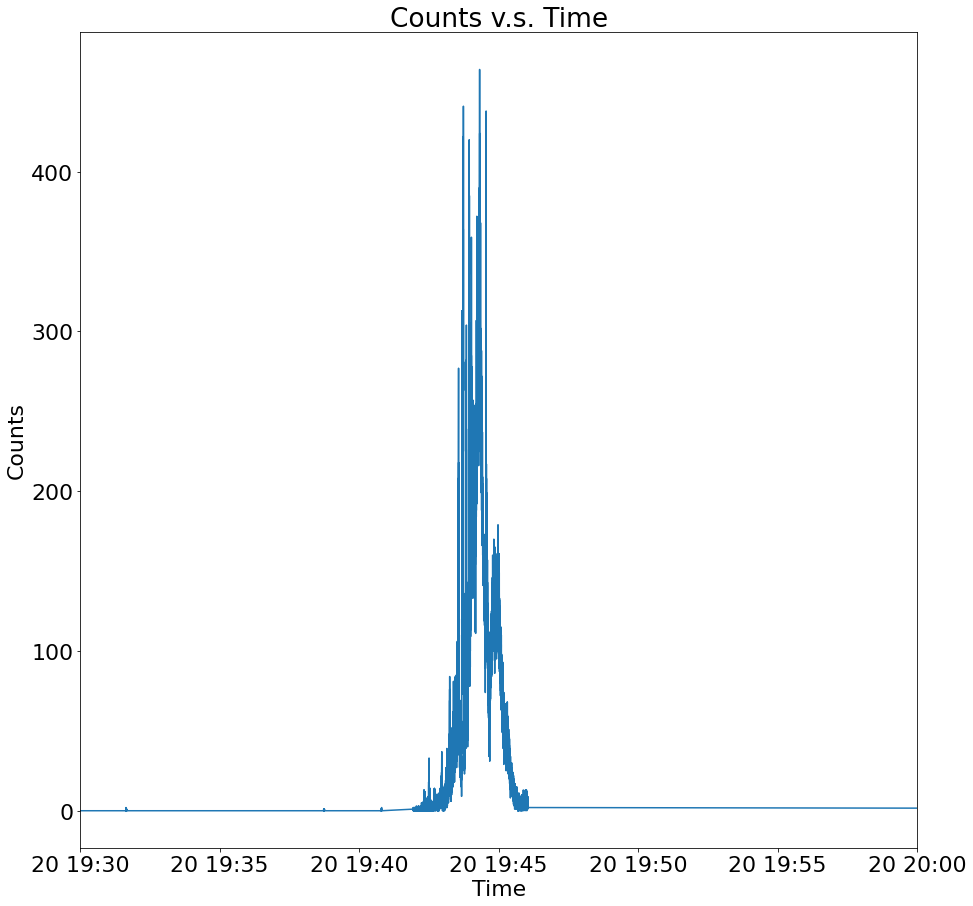

In [29]:
#zoom in a bit further
plt.plot(t_values, bursts)
plt.xlim(datetime(2016,1,20,19,30),datetime(2016,1,20,20))
plt.title('Counts v.s. Time')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

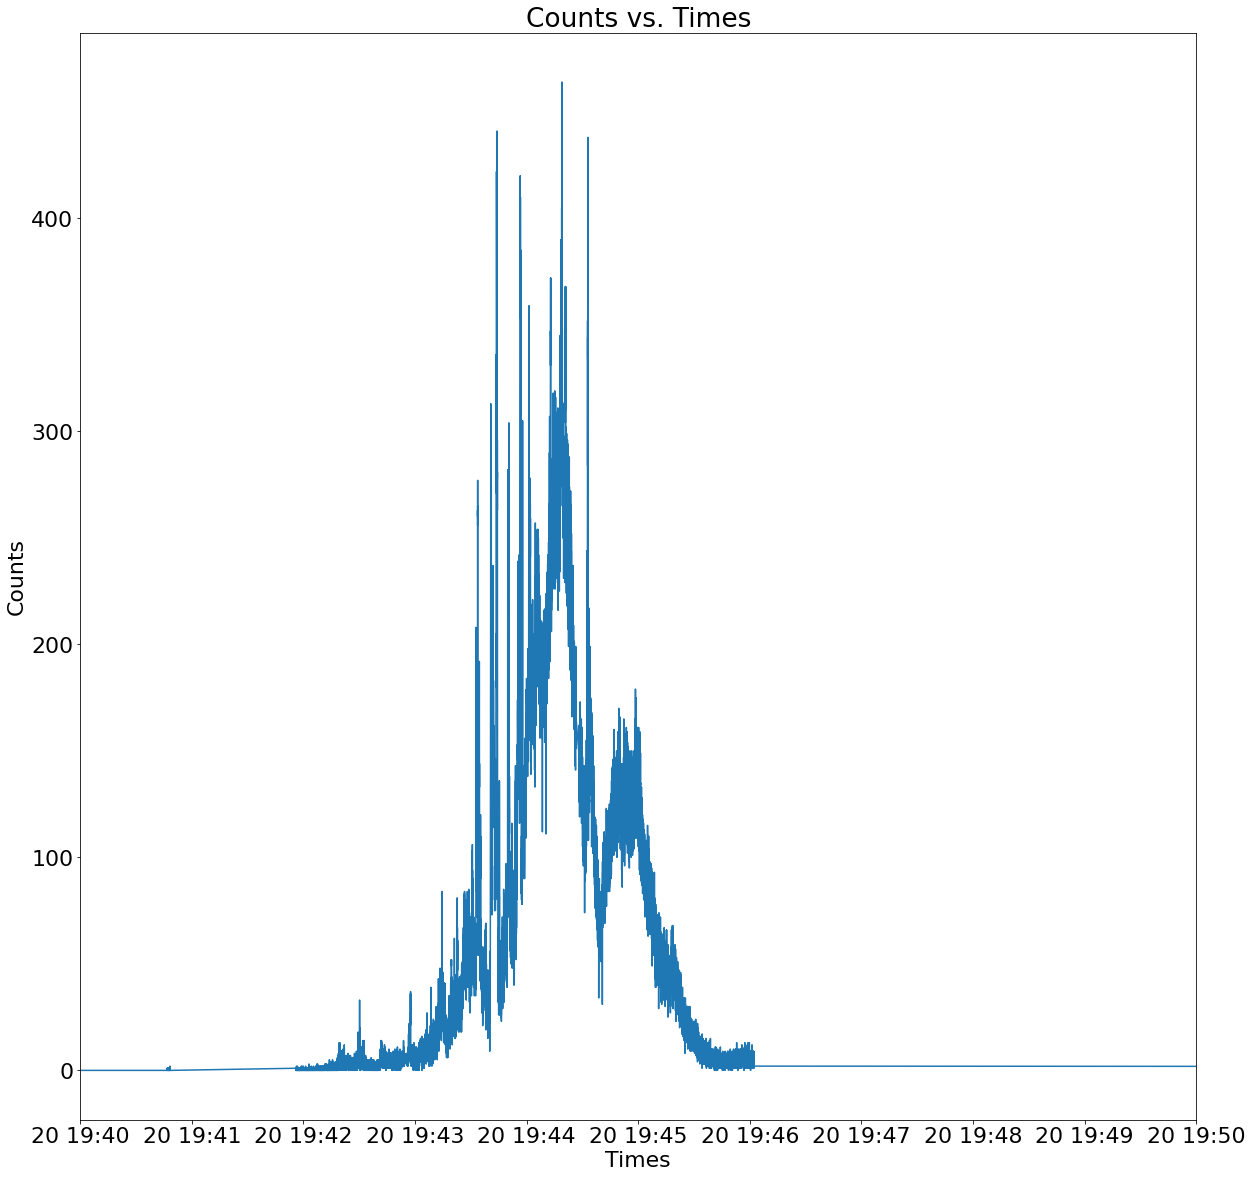

In [32]:
#zoom in a bit more
plt.plot(t_values, bursts)
plt.xlim(datetime(2016,1,20,19,40),datetime(2016,1,20,19,50))
plt.xlabel('Times')
plt.ylabel('Counts')
plt.title('Counts vs. Times')
plt.savefig('image_2.png')
plt.rcParams['figure.figsize'] = [20,15] # ths line is for resizing graphs if you wantvalues,omarmed)

Detrending Data

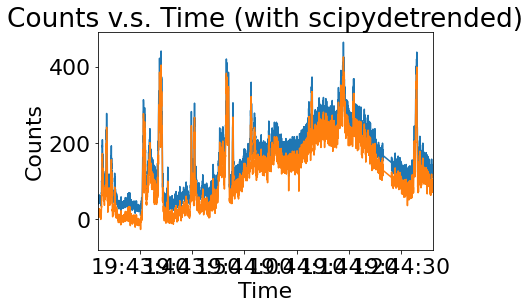

In [10]:
#test: automatic detrend er form scipy
from scipy import signal #package is needed later on

auto_detrended=signal.detrend(bursts)
plt.plot(t_values,bursts)
plt.plot(t_values,auto_detrended)
plt.xlim(datetime(2016,1,20,19,43,32),datetime(2016,1,20,19,44,36))
plt.title('Counts v.s. Time (with scipydetrended)')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Smoothed Data (np.convolve for smoothing)')

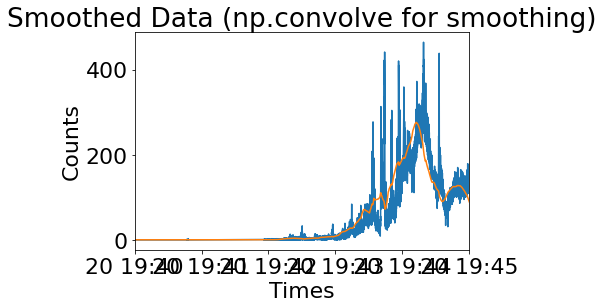

In [11]:
#test: numpy convolve for smoothing: rolling average

kernel = np.ones(800) #size can be chosen as smaller for less dramatic smoothing
conv_bursts = np.convolve(bursts, kernel)
denom=np.array([len(kernel)])
conv_avg=np.divide(conv_bursts,denom) #this is the name of the smoothed array



plt.xlim(datetime(2016,1,20,19,40),datetime(2016,1,20,19,45))
plt.plot(t_values,bursts)
plt.plot(t_values,conv_avg[int(len(kernel)-1):])

plt.xlabel('Times')
plt.ylabel('Counts')
plt.title('Smoothed Data (np.convolve for smoothing)')




In [28]:
#test: making the smoothed array manually, then subtracting to detrend


window=800 #change the smoothness: up is smoother, down is rougher.

omarmed=np.empty(len(bursts),dtype=float) #omarmed is the smoothed array

for i in range(0,len(bursts),1):
    if i<int(window/2):#assign what is outside the median window to nan values
        omarmed[i]=np.nan

    if int(window/2)<=i<=len(bursts)-int(window/2):
        omarmed[i]=np.median(bursts[int(i-window/2):int(i+window/2+1)]) #median window smoothing

    if len(bursts)-int(window/2)<i:
        omarmed[i]=np.nan

omar_detrended=bursts-omarmed

        
plt.plot(t_values,bursts)
plt.plot(t_
plt.rcParams['figure.figsize'] = [15, 15] # ths line is for resizing graphs if you wantvalues,omarmed)
plt.xlim(datetime(2016,1,20,19,43,32),datetime(2016,1,20,19,44,36))


plt.xlabel('Times')
plt.ylabel('Counts')
plt.title('Untreated, Smoothed')
plt.savefig('image_3.png')

SyntaxError: invalid syntax (694824899.py, line 23)

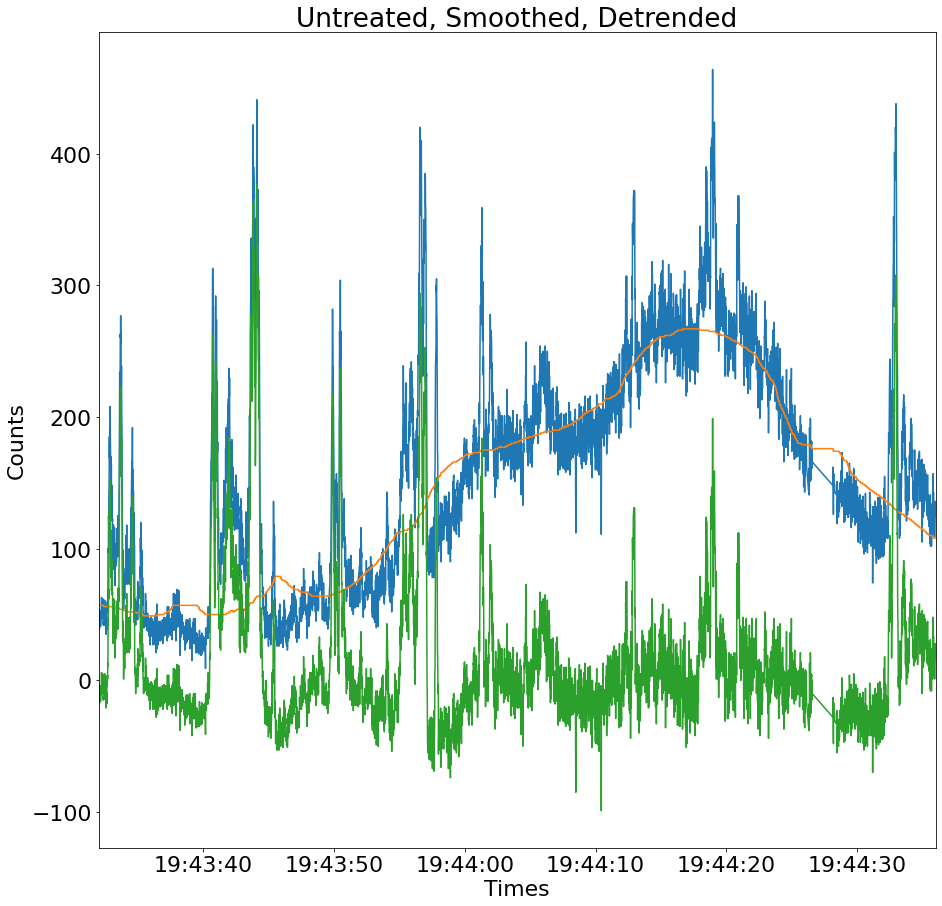

In [13]:
#graphing only the original smoothed and detrended
plt.plot(t_values,bursts)
plt.plot(t_values,omarmed)
plt.plot(t_values,omar_detrended)
plt.rcParams['figure.figsize'] = [15, 15] # ths line is for resizing graphs if you want
plt.xlim(datetime(2016,1,20,19,43,32),datetime(2016,1,20,19,44,36))


plt.xlabel('Times')
plt.ylabel('Counts')
plt.title('Untreated, Smoothed, Detrended')
plt.savefig('image_4.png')

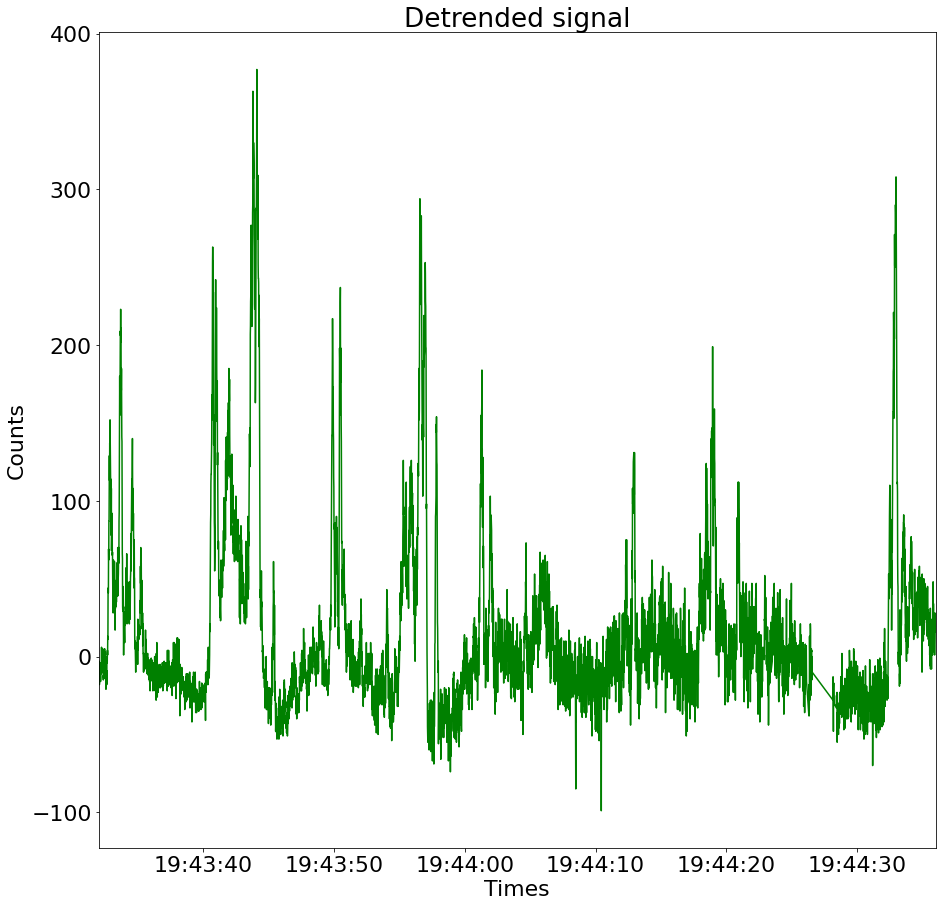

In [14]:
plt.plot(t_values,omar_detrended,'g')
plt.xlim(datetime(2016,1,20,19,43,32),datetime(2016,1,20,19,44,36))
plt.title('Detrended signal')
plt.xlabel('Times')
plt.ylabel('Counts')
plt.savefig('image_4_2')

(16820.821898148148, 16820.82263888889)

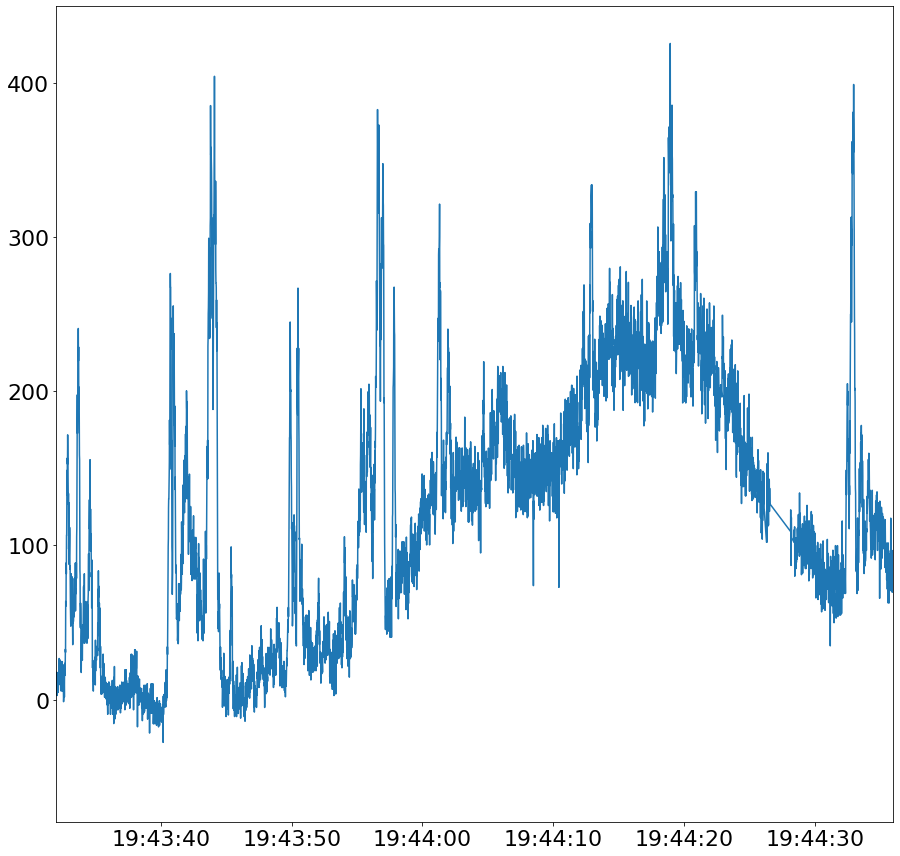

In [15]:
#compare all detrending methods plt.plot(t_values,bursts)
plt.plot(t_values,auto_detrended)
plt.xlim(datetime(2016,1,20,19,43,32),datetime(2016,1,20,19,44,36))


#you need the dang detrended version of the convloltuion test to finish this box, 
#right now you only have the smoothed

#now that we(im prettey sure well say omar_detrended is the best) have the best 
#detrended version, lets find it's peaks

Filter the Peaks for Microbursts

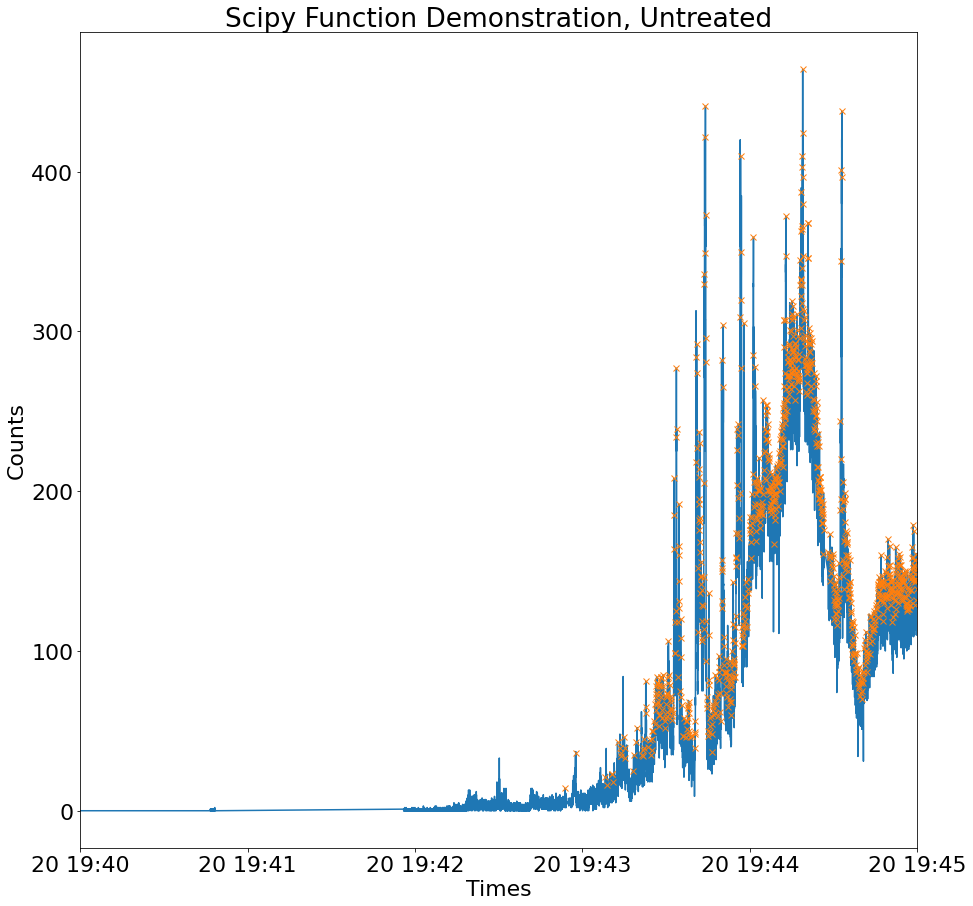

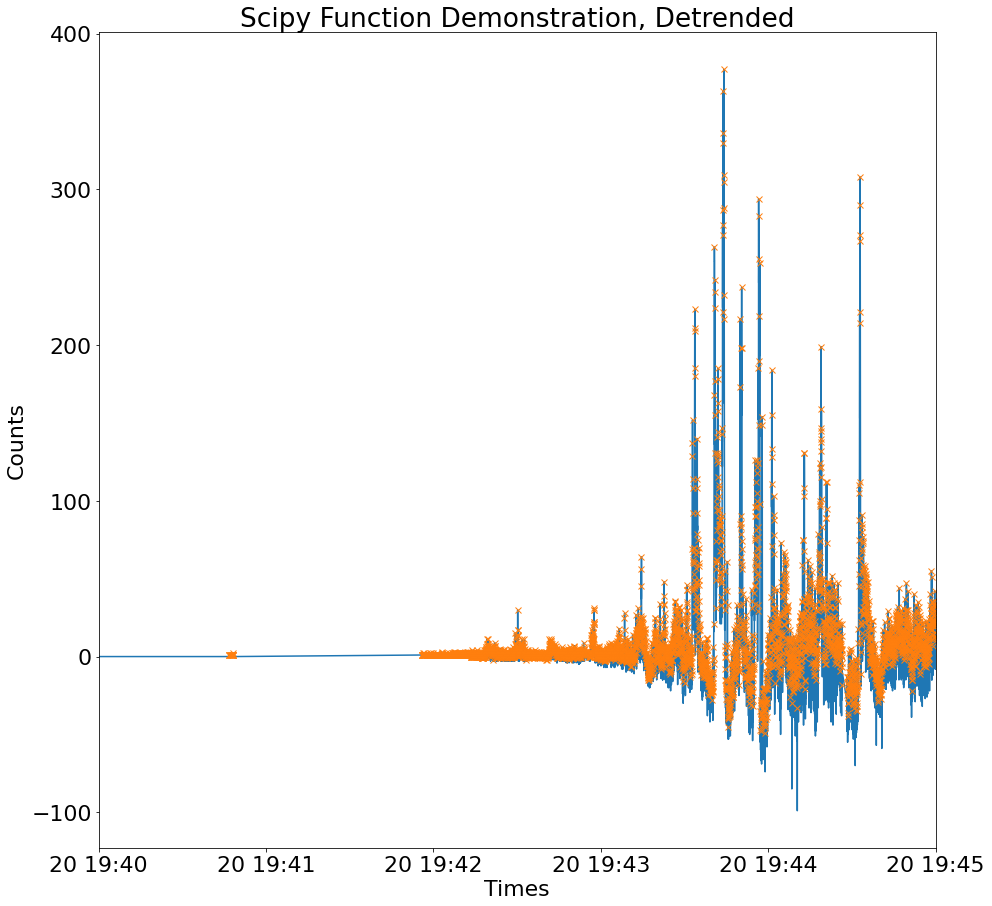

In [16]:
#find peaks outright
from scipy.signal import find_peaks #this pulls out all local maxima


#take a look at the unfiltered signal peaks
peaks, _ = find_peaks(bursts,threshold=10,width=.5)
plt.plot(t_values,bursts)
plt.plot(t_values[peaks], bursts[peaks], "x")
plt.xlim(datetime(2016,1,20,19,40),datetime(2016,1,20,19,45))
plt.xlabel('Times')
plt.ylabel('Counts')
plt.title('Scipy Function Demonstration, Untreated')
plt.savefig('image_5.png')
plt.show()



#take a look at the detrended signal peaks
peaks, _ = find_peaks(omar_detrended)
plt.plot(t_values,omar_detrended)
plt.plot(t_values[peaks], omar_detrended[peaks], "x")
plt.xlim(datetime(2016,1,20,19,40),datetime(2016,1,20,19,45))
plt.xlabel('Times')
plt.ylabel('Counts')
plt.title('Scipy Function Demonstration, Detrended')
plt.savefig('image_5_2.png')
plt.show()



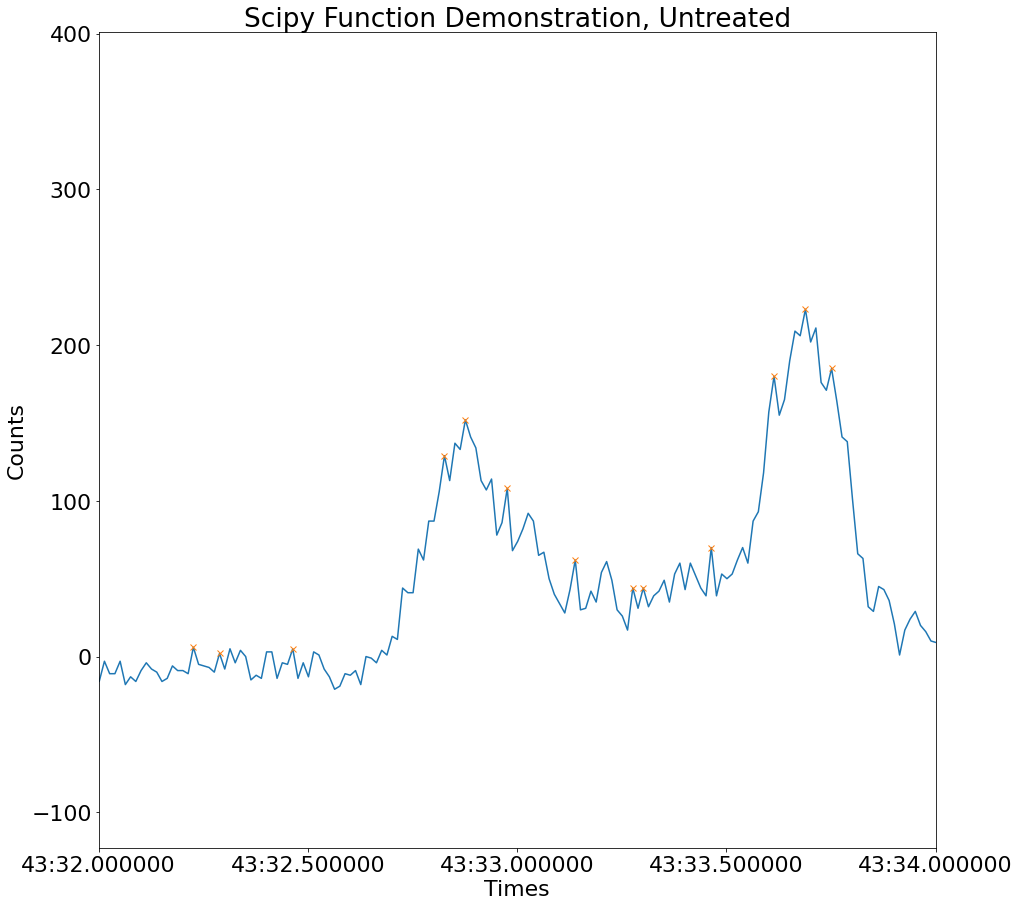

In [17]:
#find peaks outright
from scipy.signal import find_peaks #this pulls out all local maxima


#take a look at the unfiltered signal peaks
peaks, _ = find_peaks(omar_detrended,threshold=10,width=.5)
plt.plot(t_values,omar_detrended)
plt.plot(t_values[peaks], omar_detrended[peaks], "x")
plt.xlim(datetime(2016,1,20,19,43,32),datetime(2016,1,20,19,43,34)) #this is zoomed far in so we can see what the scipy function does
plt.xlabel('Times')
plt.ylabel('Counts')
plt.title('Scipy Function Demonstration, Untreated')
plt.savefig('image_6.png')
plt.show()


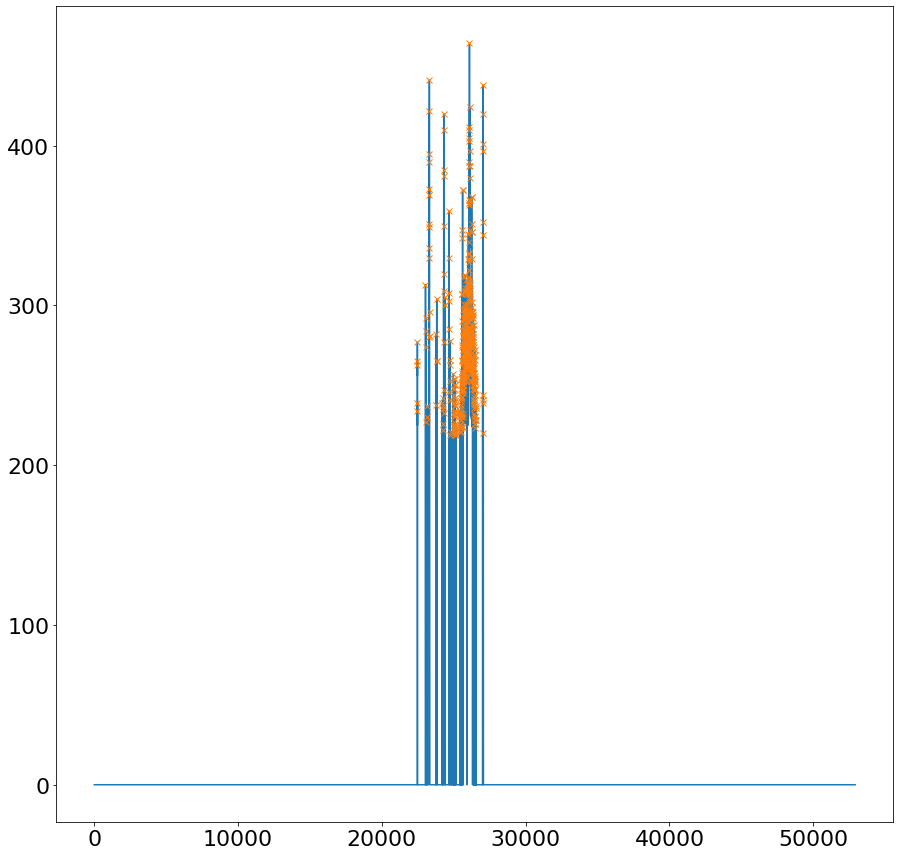

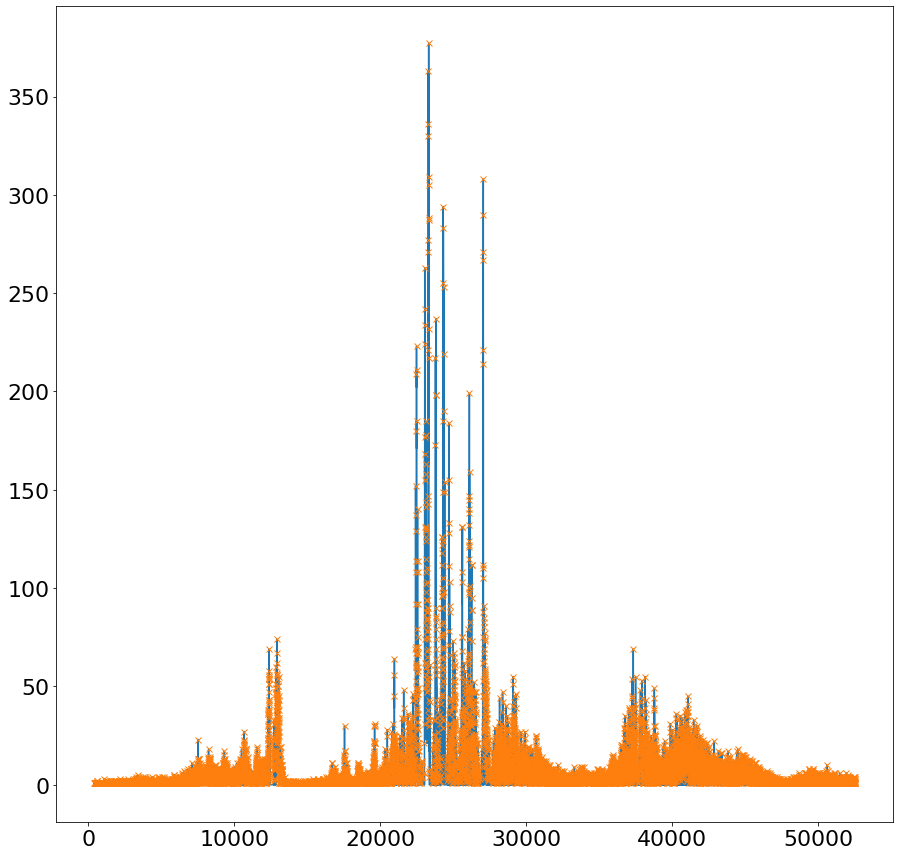

In [18]:
#filtering: if the signal is within a certain  number of standard deviations above the average in the 
#signal it wouldn't qualify as a microburst. Neither of course, will negative values

#we need the averages and standard deviations for this process
#we'll filter for peaks both in the raw and detrended signals
untouched_average=np.average(bursts)
detrended_average=np.average(omar_detrended)
untouched_sigma=np.std(bursts) 
detrended_sigma=np.std(omar_detrended)



bursts1=np.empty(len(bursts)) #bursts1 is bursts after 1st filter
for i in range(0,int(len(bursts))):
    if abs(bursts[i]-untouched_average)<3*untouched_sigma: #standard deviation condiion, 3*sigma required
        bursts1[i]=0
    elif bursts[i]<0:
        bursts1[i]=0 #positivty condition
    else:
        bursts1[i]=bursts[i]


plt.plot(bursts1)
peaks, _ = find_peaks(bursts1)
plt.plot(peaks,bursts1[peaks], "x")
plt.show()


omar_detrended1=np.empty(len(omar_detrended)) #omar_detrended1 is detrended signal after 1st filter
for i in range(0,int(len(omar_detrended))):
    if abs(omar_detrended[i]-detrended_average)<3*detrended_sigma:
        omar_detrended1[i]=0
    elif omar_detrended[i]<0:
        omar_detrended1[i]=0
    else:
        omar_detrended1[i]=omar_detrended[i]


plt.plot(omar_detrended1)
peaks, _ = find_peaks(omar_detrended1)
plt.plot(peaks,omar_detrended1[peaks], "x")

plt.show()

#note: we could also do this techniques using the threshold feature of the scipy function, 
#determied by standard deviation, it does the same thing

C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

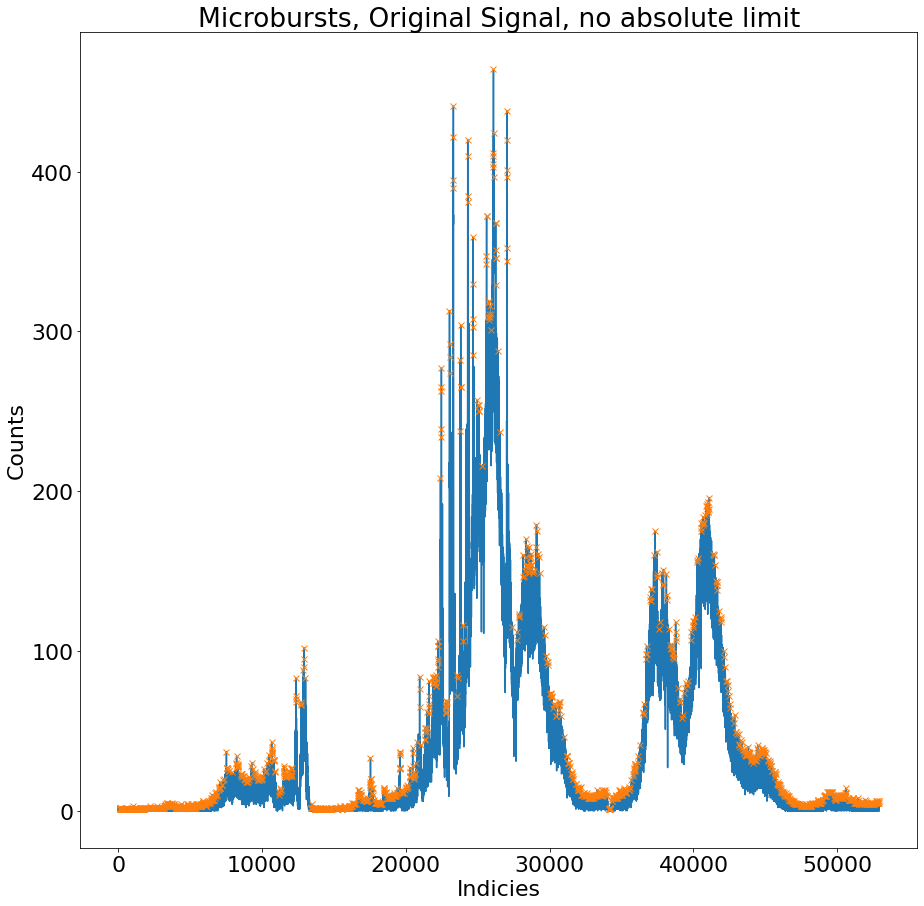

In [19]:
#Upgrade to that attempt: make the window sliding for the sigmas, centered on every microburst.
#also, we want to filter for peaks not zero out the signal

#untouched signal version
untouched_average=np.average(bursts)
peaks, _ = find_peaks(bursts)
peaks1=np.array([])

window= 200 
for i in peaks:
    window_average=np.average(bursts[int(i-window/2):int(i+window/2)])
    window_median=np.median(bursts[int(i-window/2):int(i+window/2)])
    window_sigma=np.std(bursts[int(i-window/2):int(i+window/2)])
    if abs(bursts[i]-window_average) >=2*window_sigma: #how to find the number 15 for other signals? 
        peaks1=np.append(peaks1,[i])
    else:
        pass

    
plt.plot(bursts)

peaks_values1=np.array([])
for i in peaks1:
    peaks_values1=np.append(peaks_values1,bursts[int(i)])



plt.plot(peaks1,peaks_values1, "x")
plt.xlabel('Indicies')
plt.ylabel('Counts')
plt.title('Microbursts, Original Signal, no absolute limit')
plt.savefig('image_7.png')



#after the the stdv filter, use the witdth feateure of find_peaks pick local maximum("actual microburst")

C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\oalamin\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

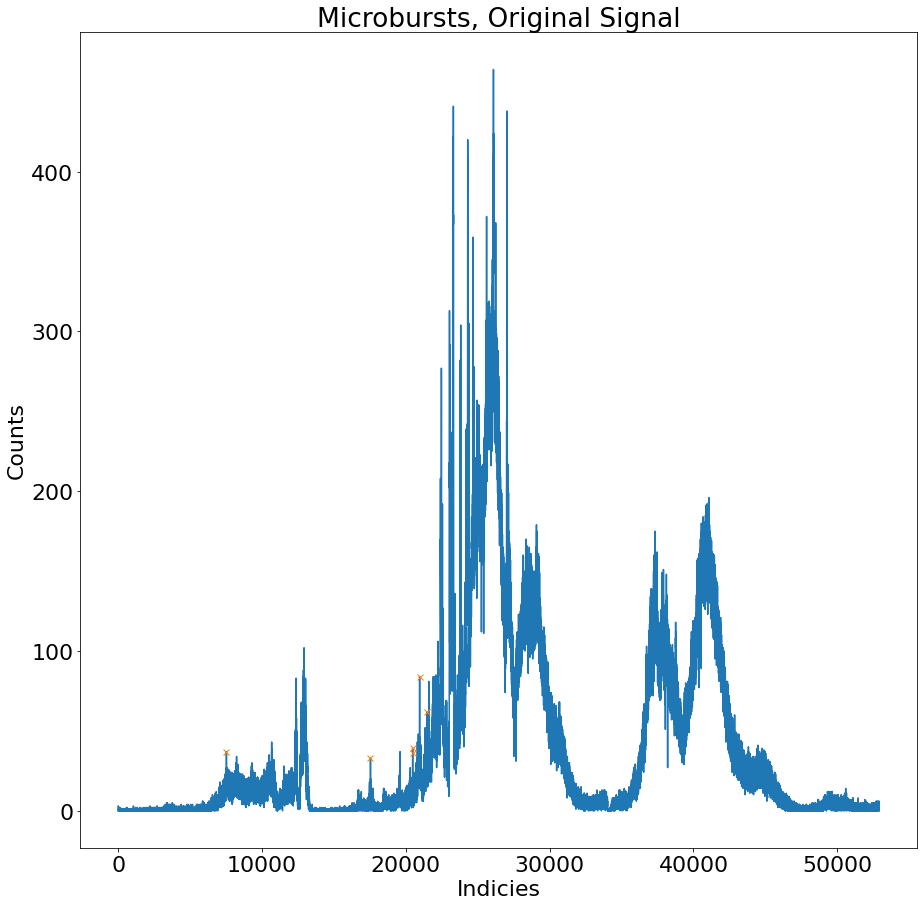

In [20]:
#Upgrade to that attempt: make the window sliding for the sigmas, centered on every microburst.
#also, we want to filter for peaks not zero out the signal

#untouched signal version
untouched_average=np.average(bursts)
peaks, _ = find_peaks(bursts)
peaks1=np.array([])

window= 200 
for i in peaks:
    window_average=np.average(bursts[int(i-window/2):int(i+window/2)])
    window_median=np.median(bursts[int(i-window/2):int(i+window/2)])
    window_sigma=np.std(bursts[int(i-window/2):int(i+window/2)])
    if abs(bursts[i]-window_average) >=4*window_sigma and abs(bursts[i]-window_median)>=15: #how to find the number 15 for other signals? 
        peaks1=np.append(peaks1,[i])
    else:
        pass

    
plt.plot(bursts)

peaks_values1=np.array([])
for i in peaks1:
    peaks_values1=np.append(peaks_values1,bursts[int(i)])



plt.plot(peaks1,peaks_values1, "x")
plt.xlabel('Indicies')
plt.ylabel('Counts')
plt.title('Microbursts, Original Signal')



plt.savefig('image_8.png')
#after the the stdv filter, use the witdth feateure of find_peaks pick local maximum("actual microburst")

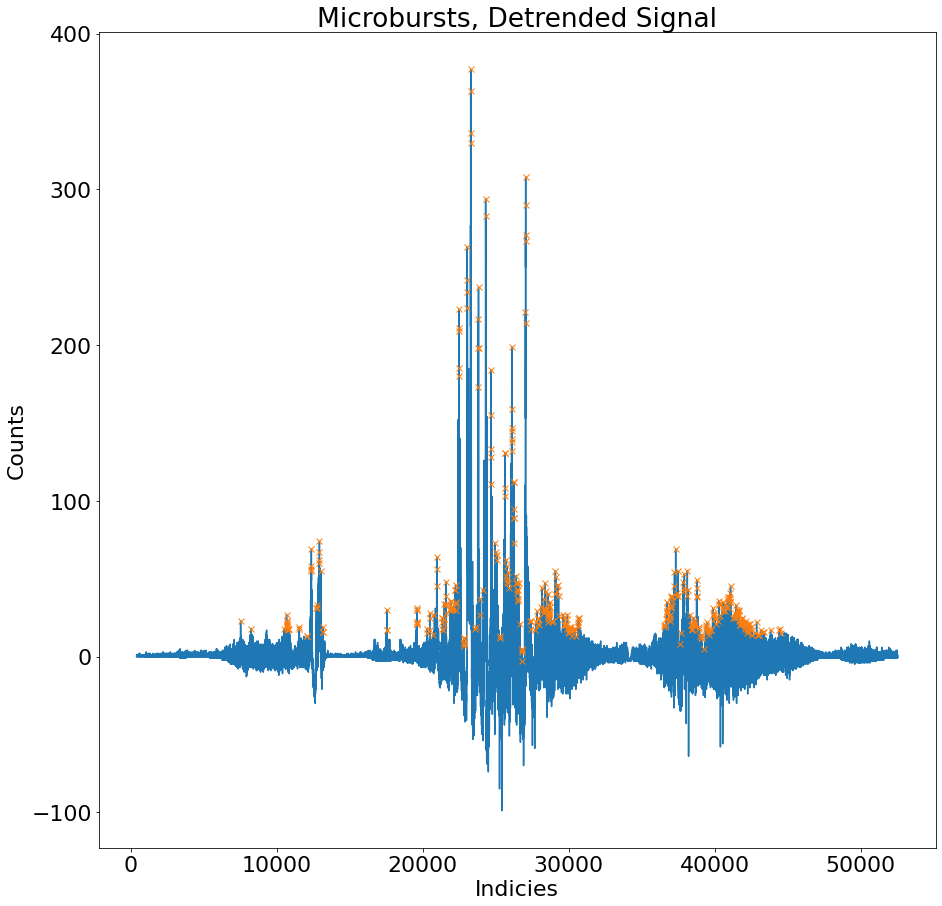

In [21]:
#Upgrade to that attempt: make the window sliding for the sigmas, centered on every microburst.
#also, we want to filter for peaks not zero out the signal

#detrended version
detrended_average=np.average(omar_detrended)
peaks, _ = find_peaks(omar_detrended)
peaks1=np.array([])

window= 200 
for i in peaks:
    window_average=np.average(omar_detrended[int(i-window/2):int(i+window/2)])
    window_median=np.median(omar_detrended[int(i-window/2):int(i+window/2)])
    window_sigma=np.std(omar_detrended[int(i-window/2):int(i+window/2)])
    if abs(omar_detrended[i]-window_average) >=2*window_sigma and abs(omar_detrended[i]-window_median)>=15: #how to find the number 15 for other signals? 
        peaks1=np.append(peaks1,[i])
    else:
        pass

    
plt.plot(omar_detrended)

peaks_values1=np.array([])
for i in peaks1:
    peaks_values1=np.append(peaks_values1,omar_detrended[int(i)])


    


plt.plot(peaks1,peaks_values1, "x")
plt.xlabel('Indicies')
plt.ylabel('Counts')
plt.title('Microbursts, Detrended Signal')

plt.savefig('image_9.png')

#after the the stdv filter, use the witdth feateure of find_peaks pick local maximum("actual microburst")

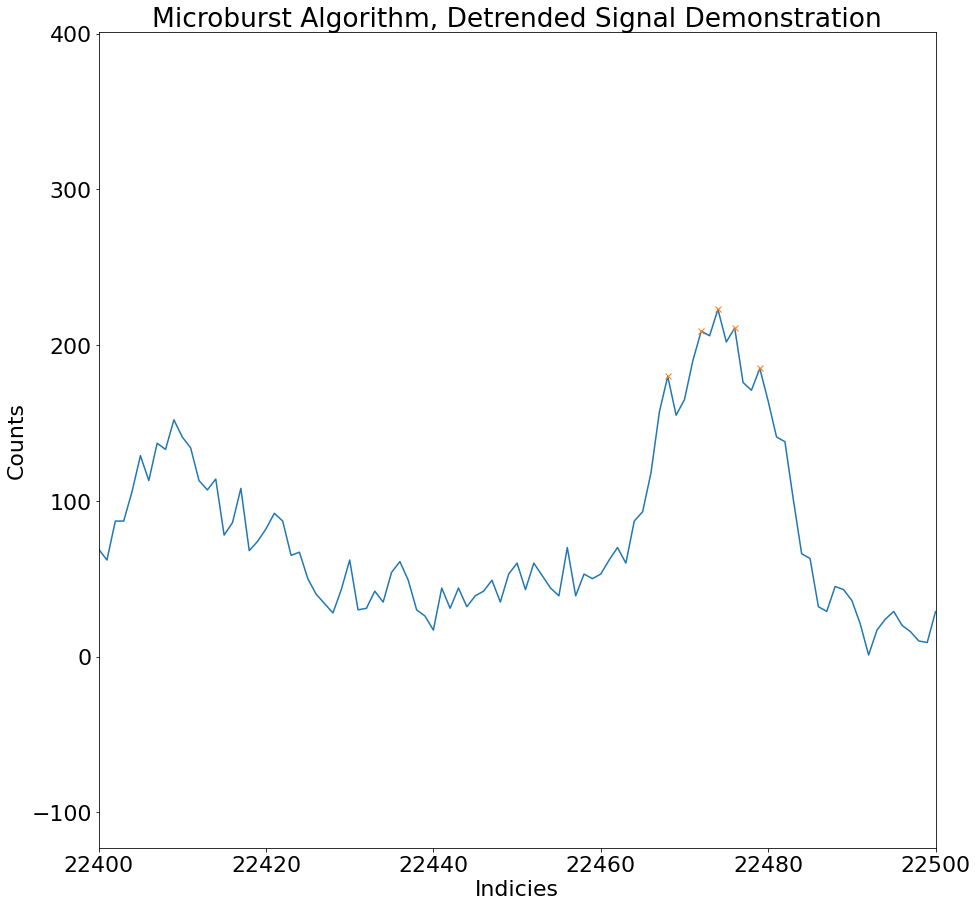

In [22]:
#Upgrade to that attempt: make the window sliding for the sigmas, centered on every microburst.
#also, we want to filter for peaks not zero out the signal

#detrended version
detrended_average=np.average(omar_detrended)
peaks, _ = find_peaks(omar_detrended)
peaks1=np.array([])

window= 200 
for i in peaks:
    window_average=np.average(omar_detrended[int(i-window/2):int(i+window/2)])
    window_median=np.median(omar_detrended[int(i-window/2):int(i+window/2)])
    window_sigma=np.std(omar_detrended[int(i-window/2):int(i+window/2)])
    if abs(omar_detrended[i]-window_average) >=2*window_sigma and abs(omar_detrended[i]-window_median)>=15: #how to find the number 15 for other signals? 
        peaks1=np.append(peaks1,[i])
    else:
        pass

    
plt.plot(omar_detrended)

peaks_values1=np.array([])
for i in peaks1:
    peaks_values1=np.append(peaks_values1,omar_detrended[int(i)])


    


plt.plot(peaks1,peaks_values1, "x")
plt.xlabel('Indicies')
plt.ylabel('Counts')
plt.title('Microburst Algorithm, Detrended Signal Demonstration')
plt.xlim(22400,22500)

plt.savefig('image_10.png')
#after the the stdv filter, use the witdth feateure of find_peaks pick local maximum("actual microburst")

Reporting microburst statistics for sample signal

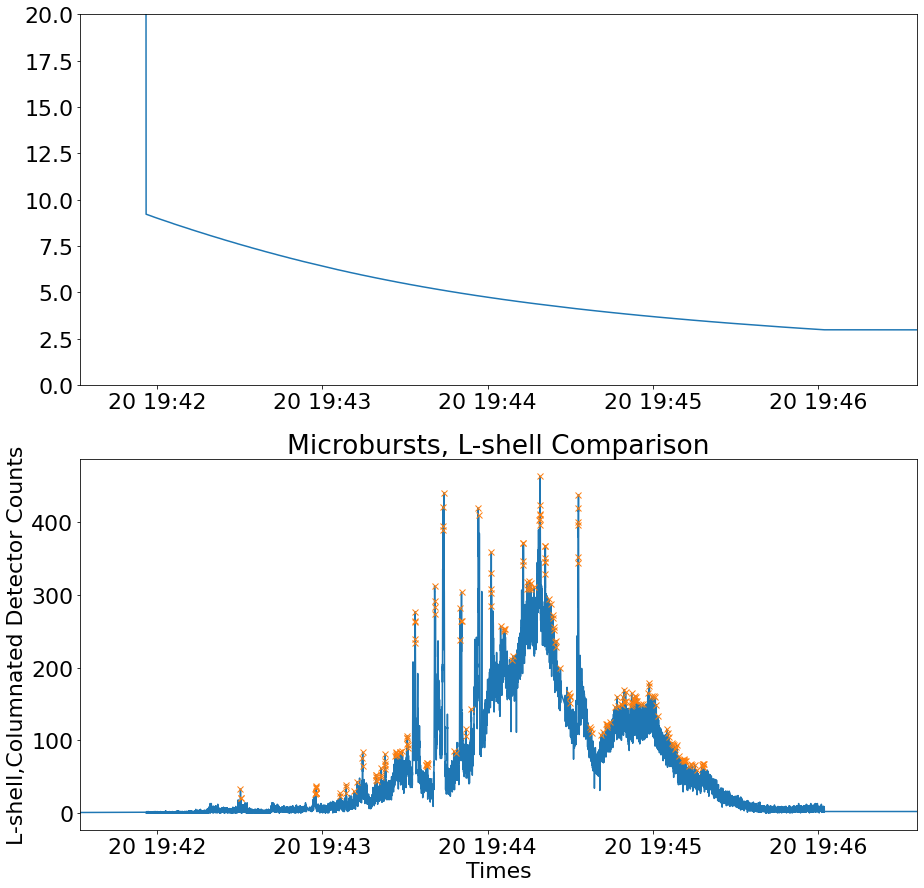

In [23]:
lshells = np.ones(52920)
for i in range(0,52920,1):
    lshells[i]=datafloats[i,26] #fills up array with lshell data, first columnated detection 219.7 - 283.4 keV

    
peaks1int=[]
for i in peaks1:
    peaks1int.append(int(i))
peaks1int=np.array(peaks1int)


fig, axs=plt.subplots(2)
plt.title('Microbursts, L-shell Comparison')
axs[0].plot(t_values,lshells) #shows time and l shell of satellite at that time
axs[1].plot(t_values,bursts) #shows time vs columated detector count
axs[1].plot(t_values[peaks1int],bursts[peaks1int],"x")
plt.xlabel('Times')
plt.ylabel('L-shell,Columnated Detector Counts')





#make them parallel to see the corespondance
axs[0].set_xlim(datetime(2016,1,20,19,41,32),datetime(2016,1,20,19,46,36))
axs[0].set_ylim(0,20)
axs[1].set_xlim(datetime(2016,1,20,19,41,32),datetime(2016,1,20,19,46,36))

plt.savefig('image_11.png')

'\n\nplt.plot(lshells[0:14342],fluxes[0:14342])\n\nlshellsforpeaks1=np.array([])\nfor i in peaks1:\n    lshellsforpeaks1=np.append(lshellsforpeaks1,lshells[int(i)]) #the lshell corresponding to each peak\n    \n\n#for i in peaks1:\n    #plt.plot(peaks1[int(i)],lshells[int(i)])\n    \nplt.plot()\n\n'

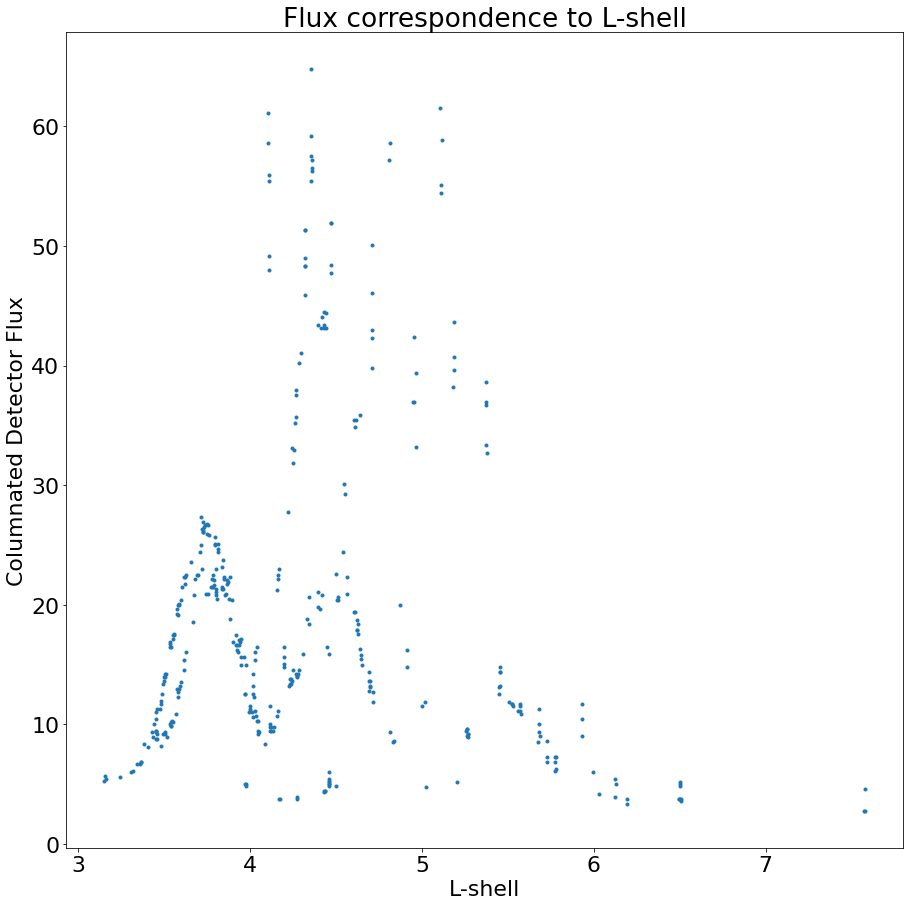

In [24]:
fluxes = np.ones(52920)
for i in range(0,52920,1):
    fluxes[i]=datafloats[i,1] #fills up array, flux first columnated 219.7 - 283.4 keV

    
#top left (looks more like top right?) corner graph: L shell the microburst occors at and flux it has)

#for i in peaks1:
    #plt.plot(lshells[int(i)],fluxes[int(i)],".")
    
lshellsforpeaks1=[]
for i in peaks1:
    lshellsforpeaks1.append(lshells[int(i)]) #this is the lshell belonging to any of the microbursts
lshellsforpeaks1=np.array(lshellsforpeaks1)

fluxesforpeaks1=[]
for i in peaks1:
    fluxesforpeaks1.append(fluxes[int(i)]) #this is the lshell belonging to any of the microbursts 
fluxesforpeaks1=np.array(fluxesforpeaks1)




plt.plot(lshellsforpeaks1,fluxesforpeaks1,'.')

plt.xlabel('L-shell')
plt.ylabel('Columnated Detector Flux')
plt.title('Flux correspondence to L-shell')
plt.savefig('image_13.png')
    

"""

plt.plot(lshells[0:14342],fluxes[0:14342])

lshellsforpeaks1=np.array([])
for i in peaks1:
    lshellsforpeaks1=np.append(lshellsforpeaks1,lshells[int(i)]) #the lshell corresponding to each peak
    

#for i in peaks1:
    #plt.plot(peaks1[int(i)],lshells[int(i)])
    
plt.plot()

"""

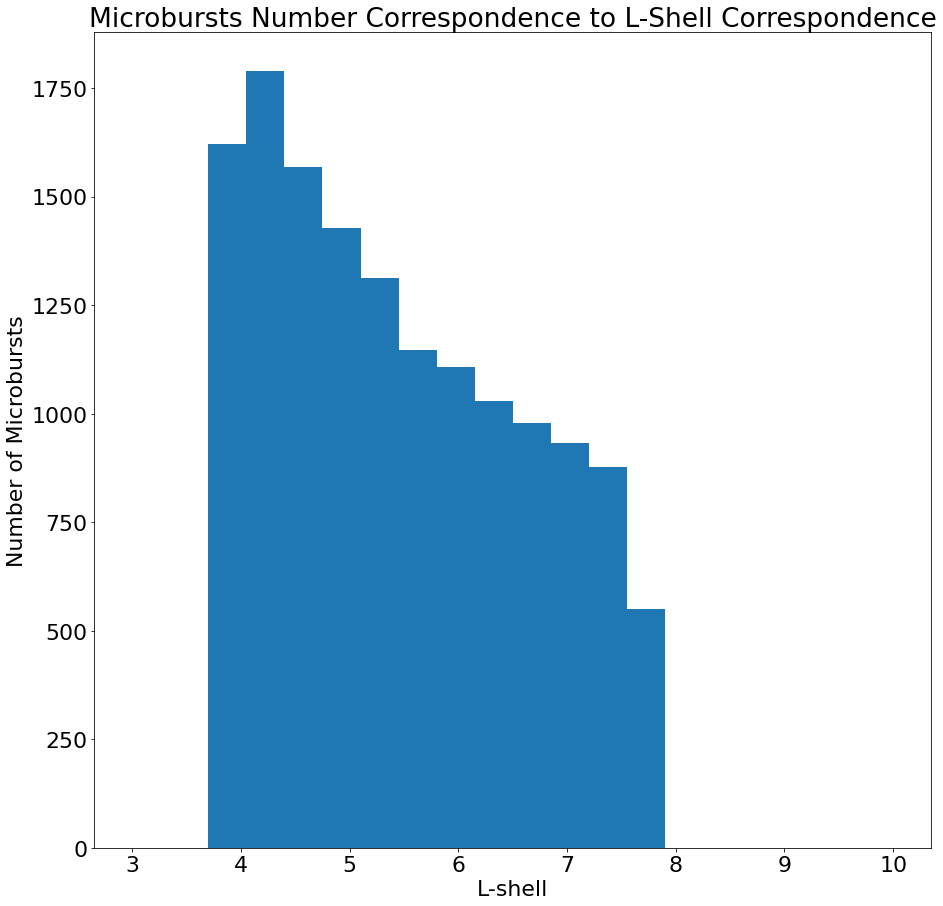

In [25]:
lshellsforpeaks1=np.array([])
for i in peaks1:
    lshellsforpeaks1=np.append(lshellsforpeaks1,lshells) #this is the lshell belonging to any of the microbursts


plt.hist(lshellsforpeaks1[0:14342],bins=20,range=(3,10))
plt.xlabel('L-shell')
plt.ylabel('Number of Microbursts')
plt.title('Microbursts Number Correspondence to L-Shell Correspondence')
plt.savefig('image_12.png')

In [26]:

#------------------------
#bring in the second and third columnated detector for energy ranges. These are less likely to get 
#microbursts? 2so they're used more to confirm results from the first?
bursts1 = np.ones(52920)
for i in range(0,52920,1):
    bursts1[i]=datafloats[i,14] #283.4 - 383.6 keV
bursts2 = np.ones(52920)
for i in range(0,52920,1):
    bursts2[i]=datafloats[i,15] #383.6 - 520.3 keV
    


In [27]:
#filter #1: standerd dev: get the std dev of detrended and flatten the curve anywhere that is less than
#the three stdv from the average. try with orinigal signal as well. use a masking array to eleminate that
#which does does not pass the standard dev chcke.
#filter 2: get rid of anything pointing down if needed
#filter 3: the other energy filters

#make a different window or the detrending and the stdv?

#proposed future evelopment: the other energies